<a href="https://www.kaggle.com/code/abhinandansamal/mohshardness-randomforestregressor?scriptVersionId=153629946" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, loguniform, uniform
from scipy.stats import zscore
from scipy.stats import probplot, skew

from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [2]:
# loading the train & test dataset
mohs_hardness_train_data = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv")
mohs_hardness_test_data = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv")

In [3]:
mohs_hardness_train_data.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
mohs_hardness_train_data.shape

(10407, 13)

In [5]:
mohs_hardness_test_data.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [6]:
mohs_hardness_test_data.shape

(6939, 12)

In [7]:
mohs_hardness_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [8]:
mohs_hardness_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6939 non-null   int64  
 1   allelectrons_Total     6939 non-null   float64
 2   density_Total          6939 non-null   float64
 3   allelectrons_Average   6939 non-null   float64
 4   val_e_Average          6939 non-null   float64
 5   atomicweight_Average   6939 non-null   float64
 6   ionenergy_Average      6939 non-null   float64
 7   el_neg_chi_Average     6939 non-null   float64
 8   R_vdw_element_Average  6939 non-null   float64
 9   R_cov_element_Average  6939 non-null   float64
 10  zaratio_Average        6939 non-null   float64
 11  density_Average        6939 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 650.7 KB


In [9]:
# Check missing values in train data
mohs_hardness_train_data.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [10]:
# Check missing values in test data
mohs_hardness_test_data.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

In [11]:
# Check duplicate valuesin train data
mohs_hardness_train_data[mohs_hardness_train_data.duplicated()]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness


In [12]:
# Check duplicate values in test data
mohs_hardness_test_data[mohs_hardness_test_data.duplicated()]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average


In [13]:
mohs_hardness_train_data.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [14]:
features_to_exclude_train = ['id', 'Hardness']
remaining_features_train_df = mohs_hardness_train_data.drop(columns=features_to_exclude_train)
remaining_features_train_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481


In [15]:
features_to_exclude_test = ['id']
remaining_features_test_df = mohs_hardness_test_data.drop(columns=features_to_exclude_test)
remaining_features_test_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


<h2 style="color:red">Outlier Detection & Handling</h2>

In [16]:
# Calculate z-scores for each feature of train data
z_scores = zscore(remaining_features_train_df)

# Set a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
threshold = 3

# Identify outliers based on the threshold
outliers = (abs(z_scores) > threshold).any(axis=1)
# Removing the outliers
df_train_no_outliers = mohs_hardness_train_data[~outliers]
df_train_no_outliers.shape

(9557, 13)

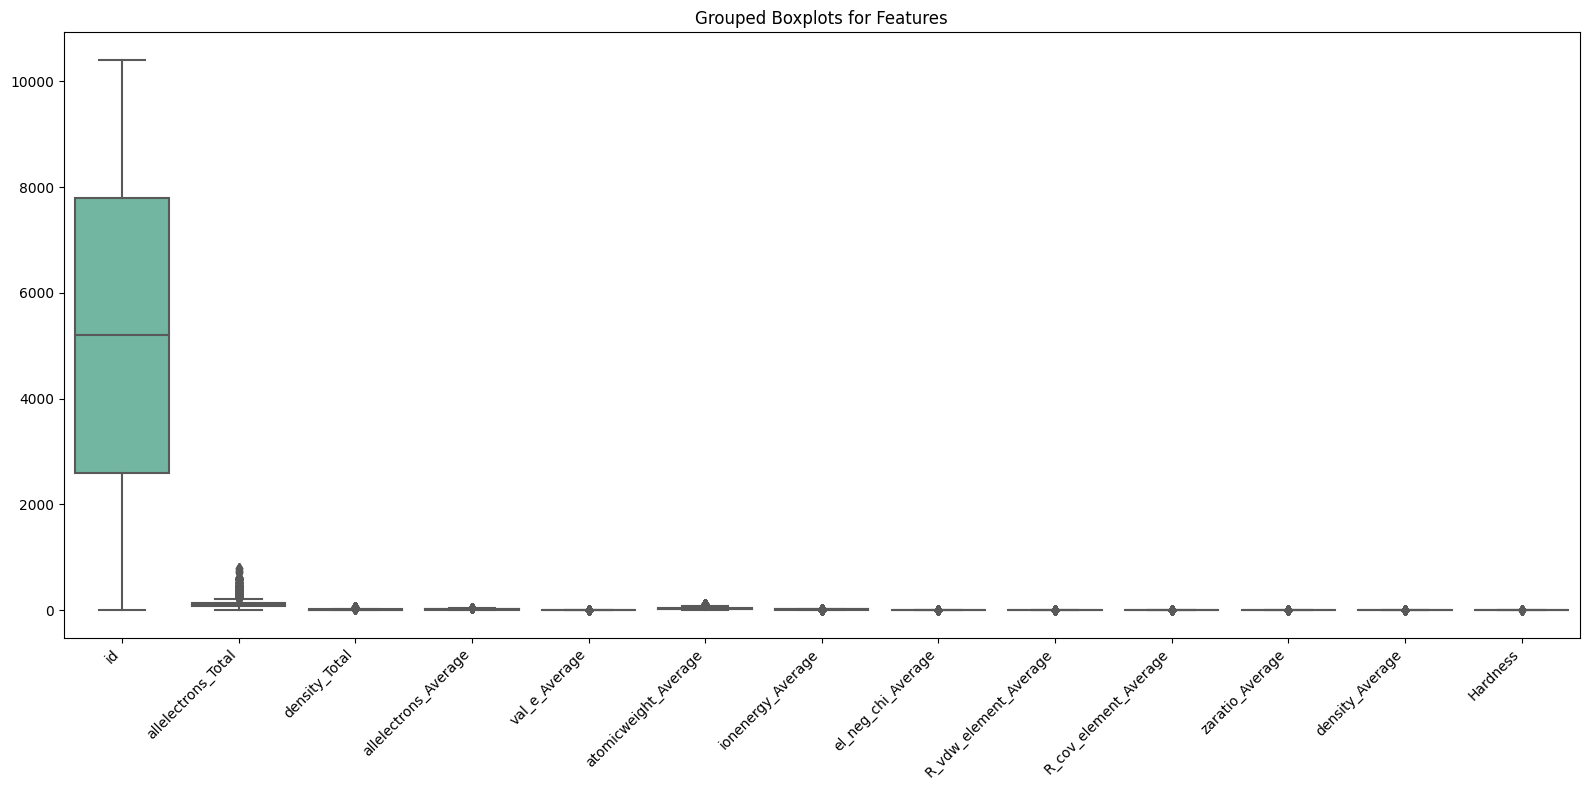

In [17]:
# Plot grouped Boxplot to view the distribution & potential outliers for the features
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_train_no_outliers, palette='Set2')
# Adjust layout
plt.title('Grouped Boxplots for Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [18]:
# Calculate z-scores for each feature of test data
# z_scores_test = zscore(remaining_features_test_df)

# Set a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
# threshold = 3

# Identify outliers based on the threshold
# outliers_t = (abs(z_scores_test) > threshold).any(axis=1)
# Removing the outliers
# df_test_no_outliers = mohs_hardness_test_data[~outliers_t]
# df_test_no_outliers.shape

<h2 style='color:red'>Data Distribution & Skewness Check</h2>

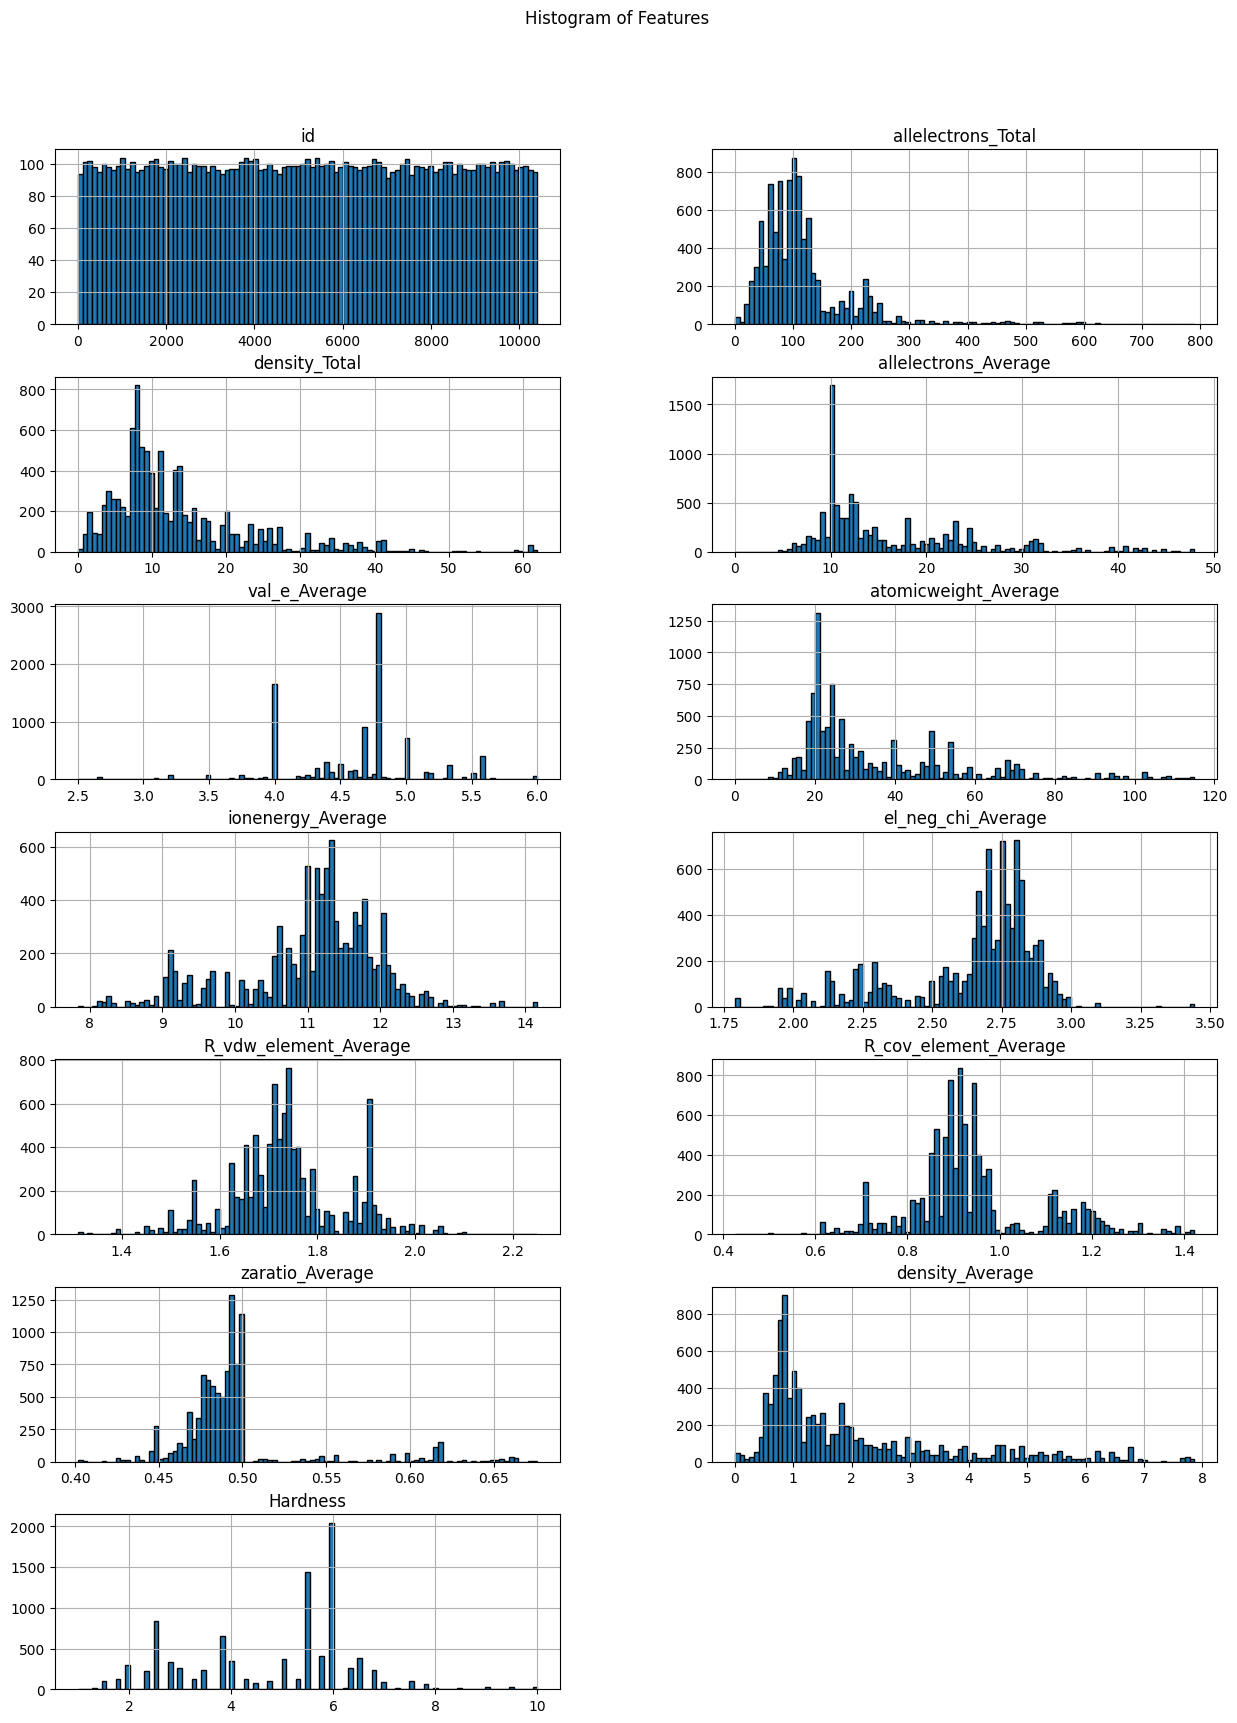

In [19]:
# data distribution of each feature of train data using histogram
num_bins = int(np.sqrt(len(df_train_no_outliers)))

df_train_no_outliers.hist(bins=num_bins, figsize=(15, 20), edgecolor="black", layout=(7, 2))
plt.suptitle("Histogram of Features", x=0.5, y=0.95, ha="center", fontsize="large")
plt.style.use("ggplot")
plt.show()

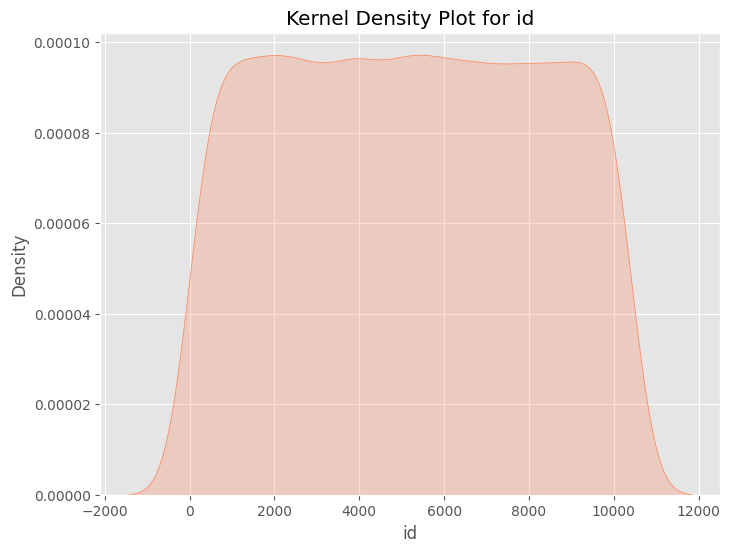

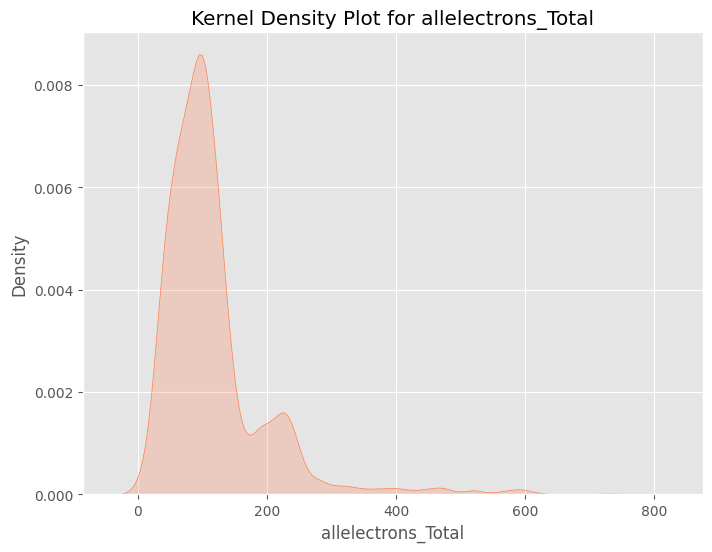

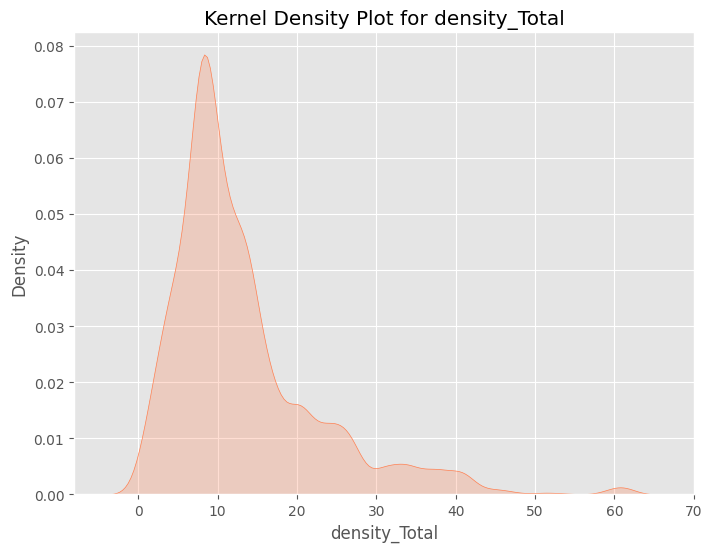

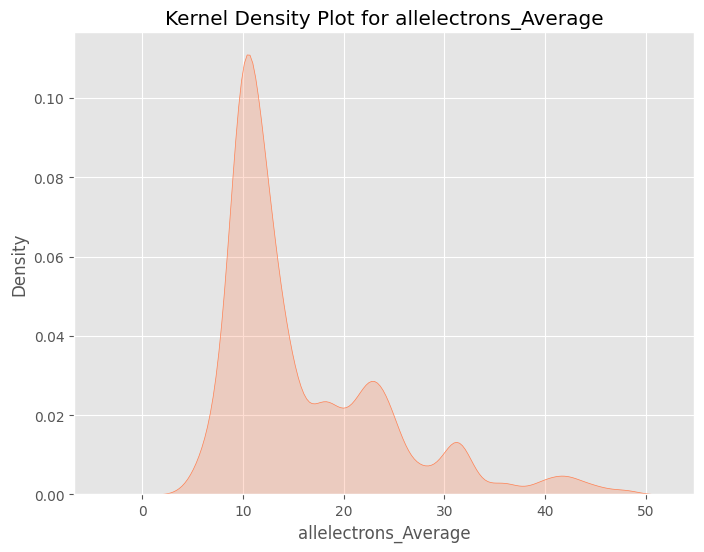

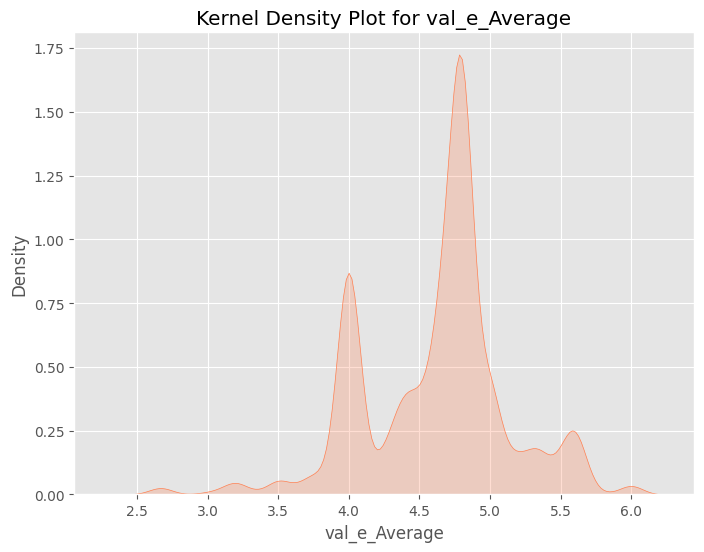

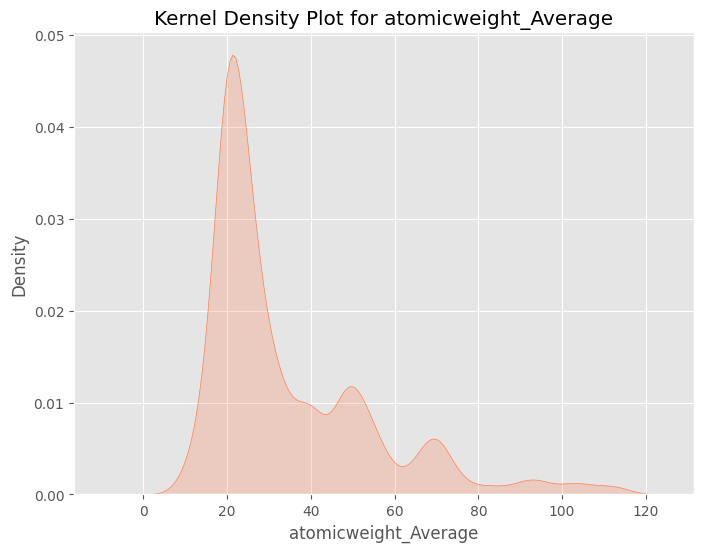

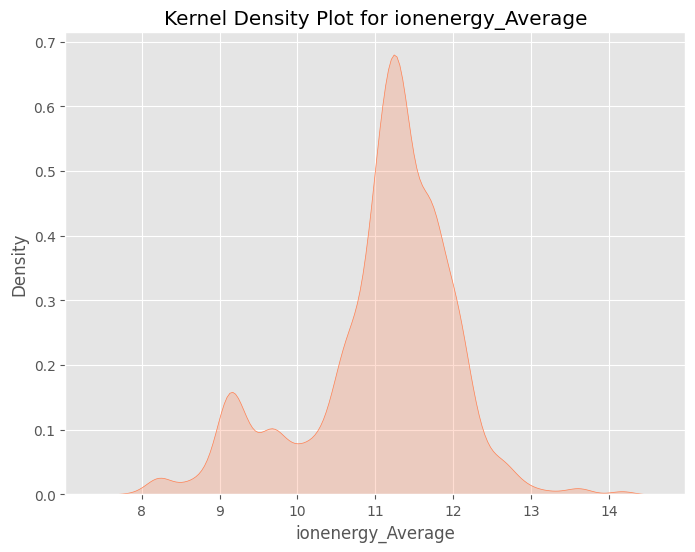

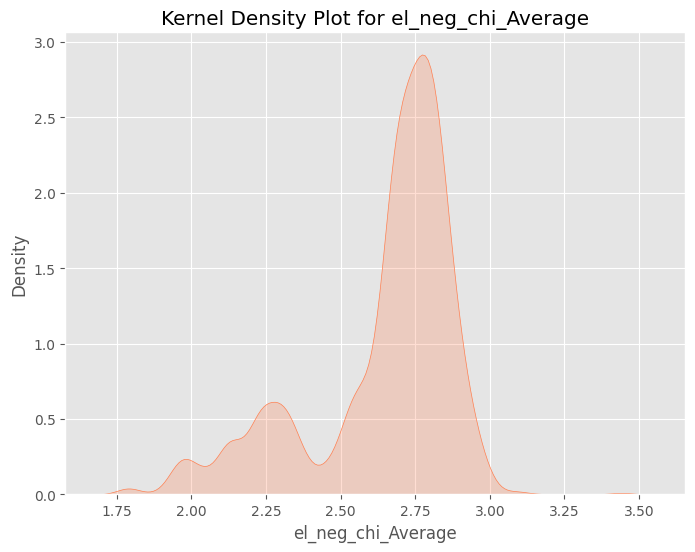

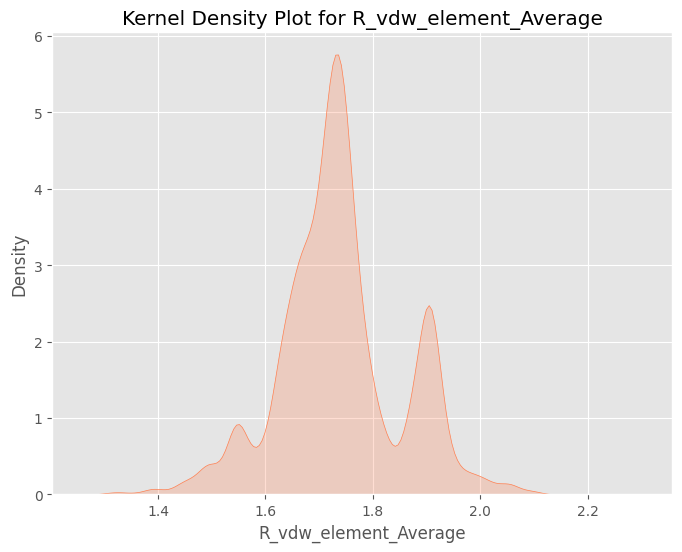

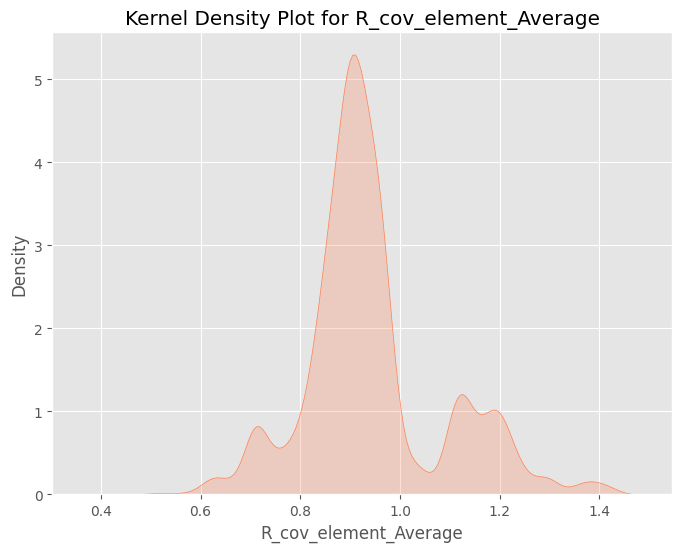

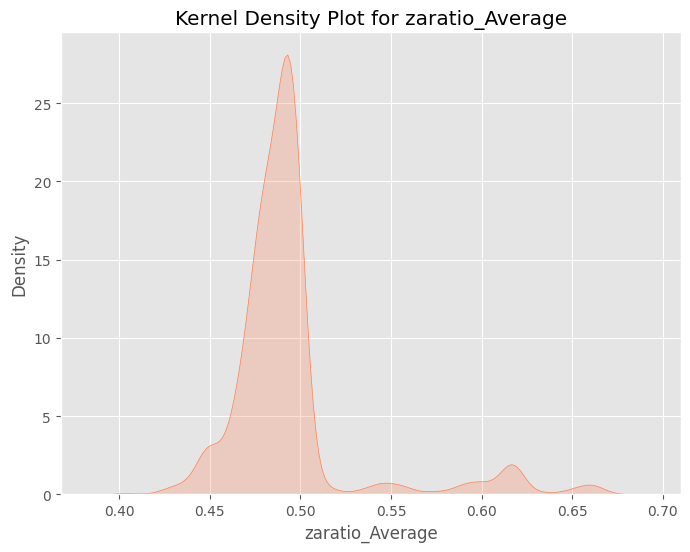

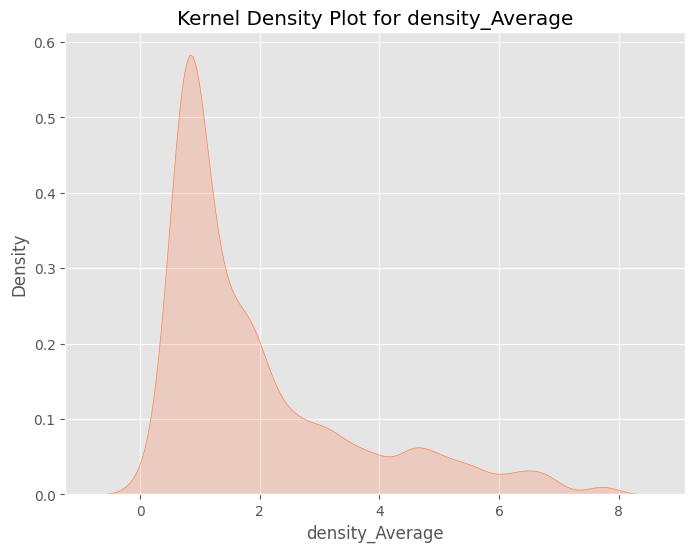

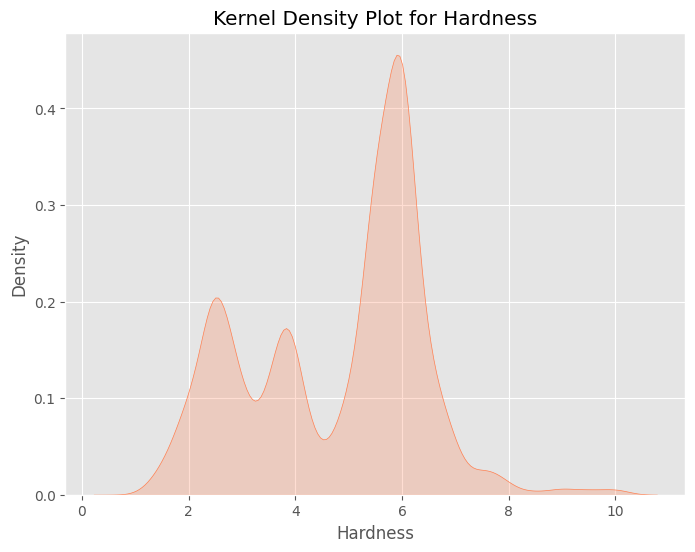

In [20]:
# data distribution of each feature of Train data using Kernel Density Plot
for column in df_train_no_outliers.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df_train_no_outliers[column], color='coral', fill=True)
    plt.title(f'Kernel Density Plot for {column}')
    plt.show()

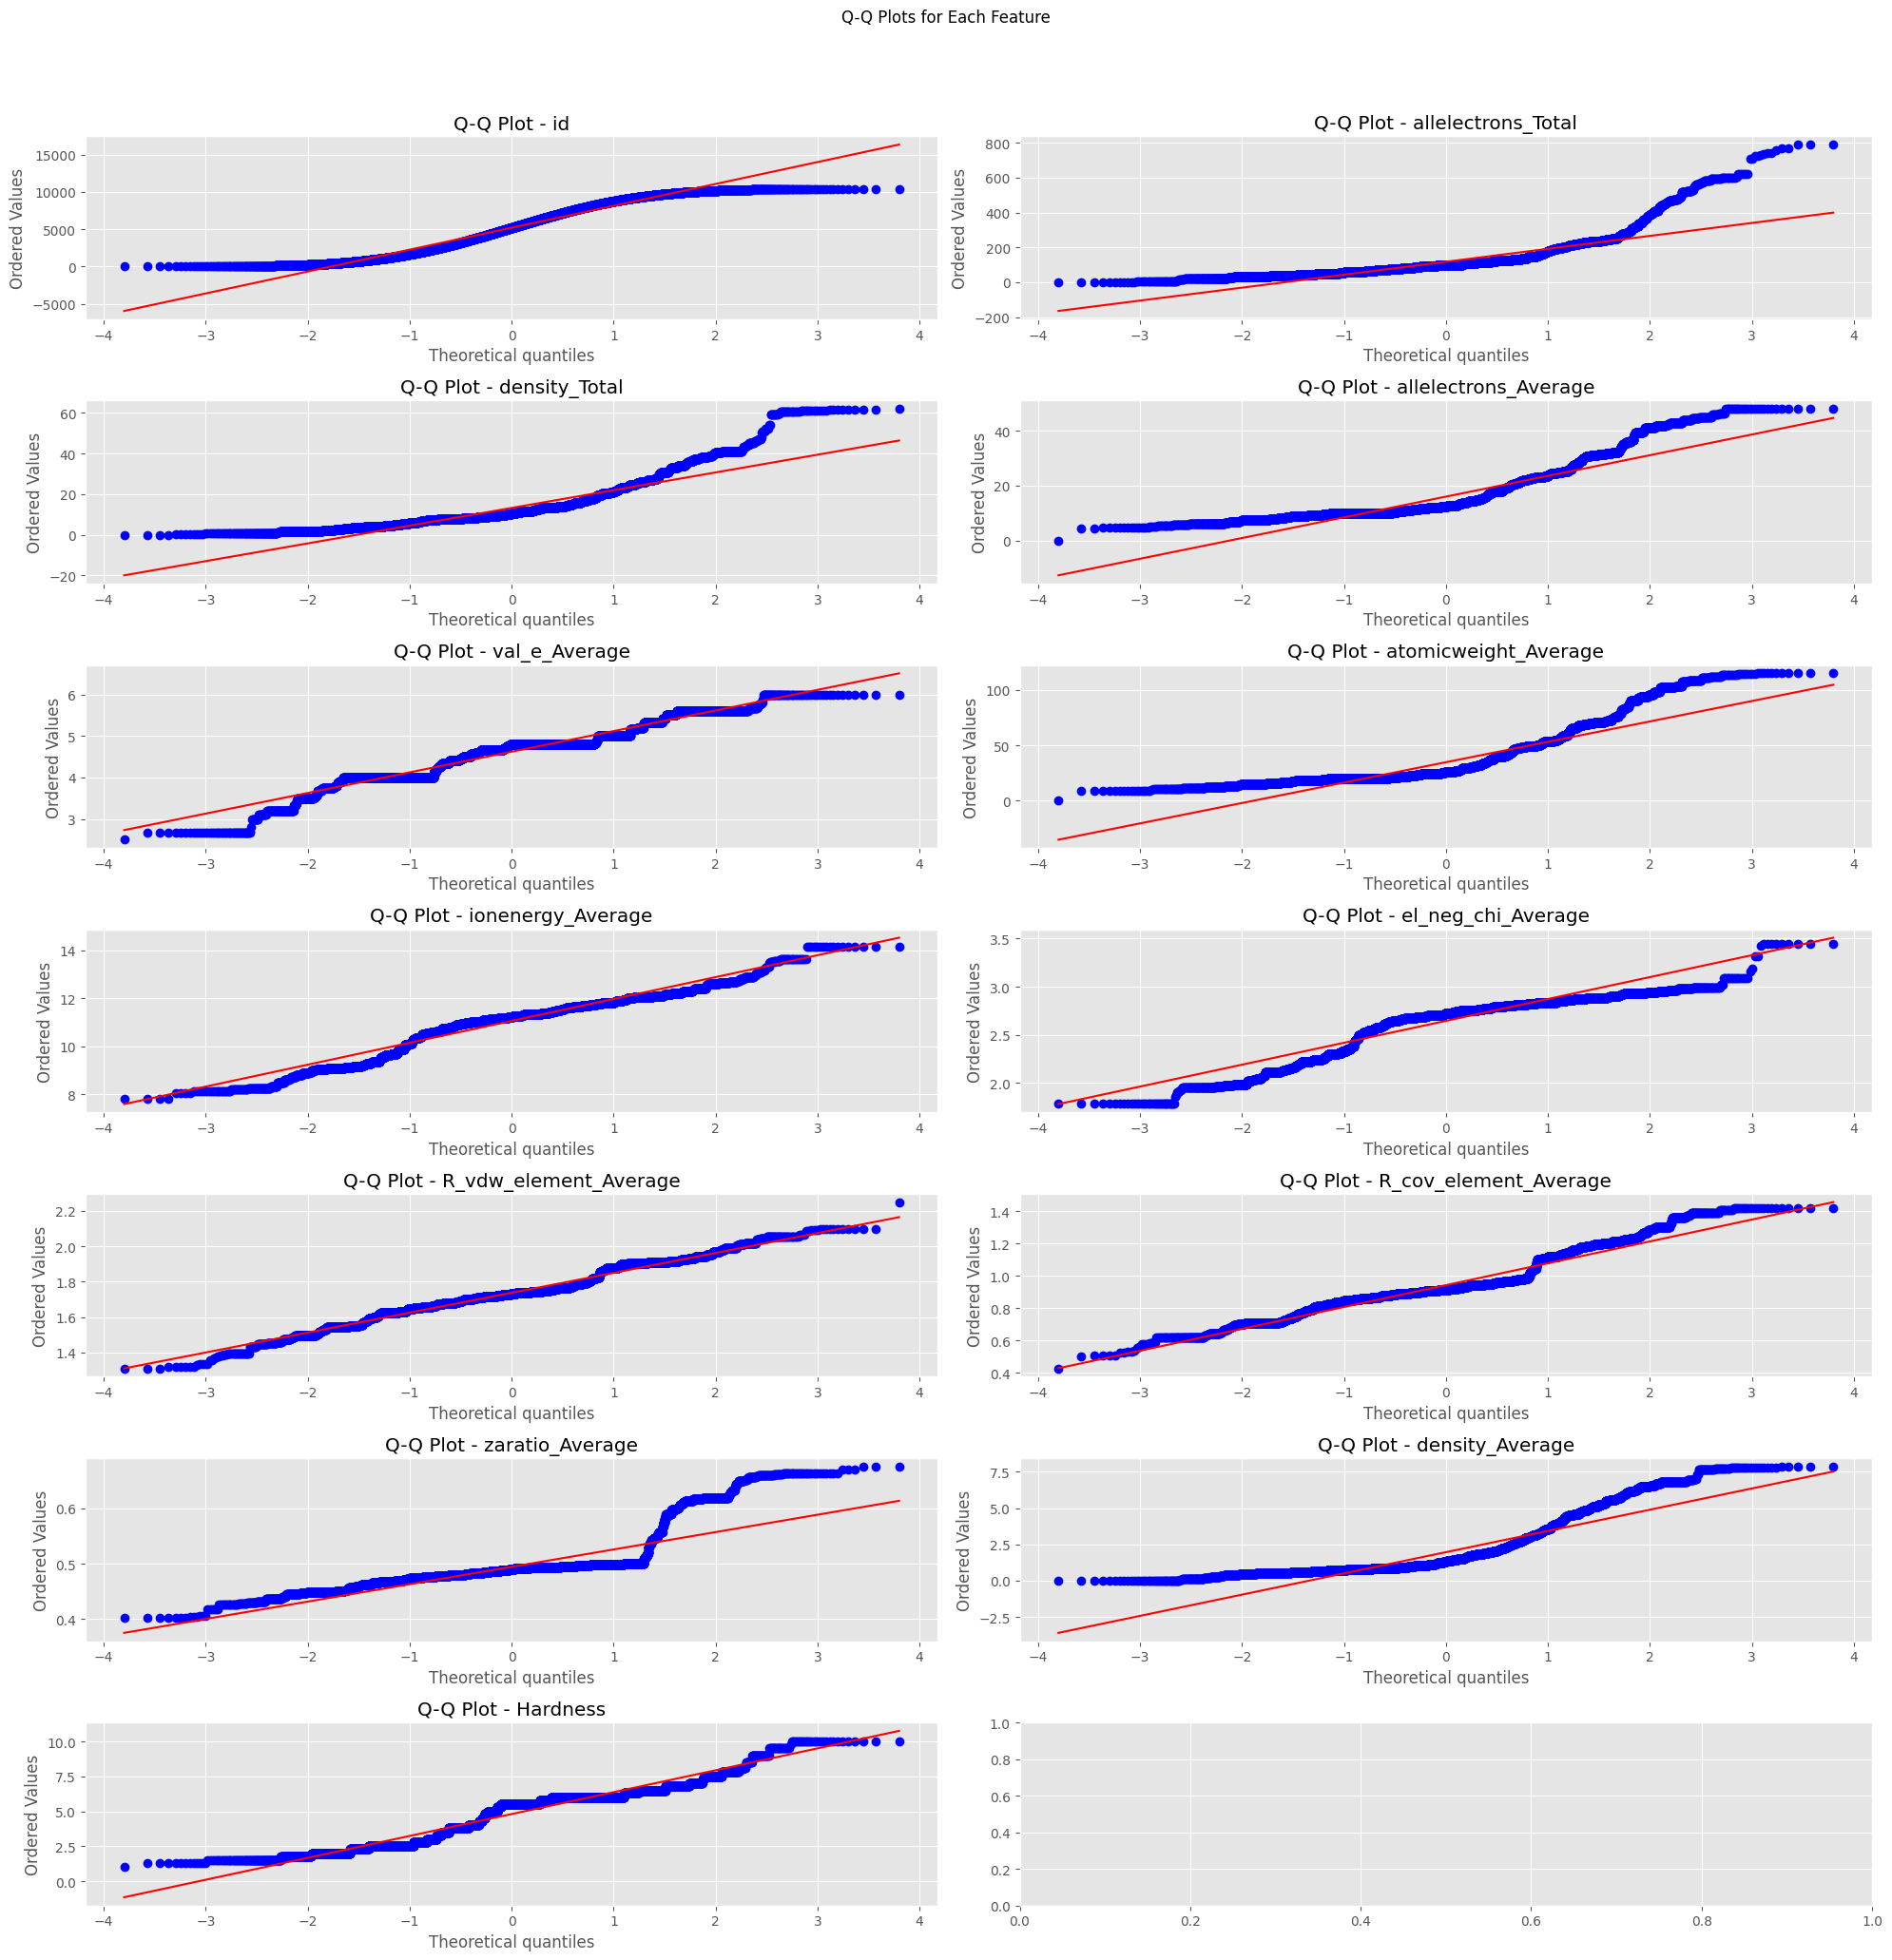

In [21]:
# Q-Q Plot to understand data distribution

# Set the number of subplots per row
subplots_per_row = 2
# Calculate the number of rows needed
num_features = df_train_no_outliers.shape[1]
num_rows = (num_features - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 3 * num_rows))
fig.suptitle('Q-Q Plots for Each Feature')

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Plot Q-Q plots for each feature
for i, (column, ax) in enumerate(zip(df_train_no_outliers.columns, axes)):
    probplot(df_train_no_outliers[column], plot=ax)
    ax.set_title(f'Q-Q Plot - {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Skewness coefficients for each feature:
id                       0.004329
allelectrons_Total       2.852488
density_Total            1.785982
allelectrons_Average     1.493235
val_e_Average           -0.400612
atomicweight_Average     1.600887
ionenergy_Average       -0.786355
el_neg_chi_Average      -1.234199
R_vdw_element_Average    0.097929
R_cov_element_Average    0.747426
zaratio_Average          2.476357
density_Average          1.494540
Hardness                -0.227160
dtype: float64


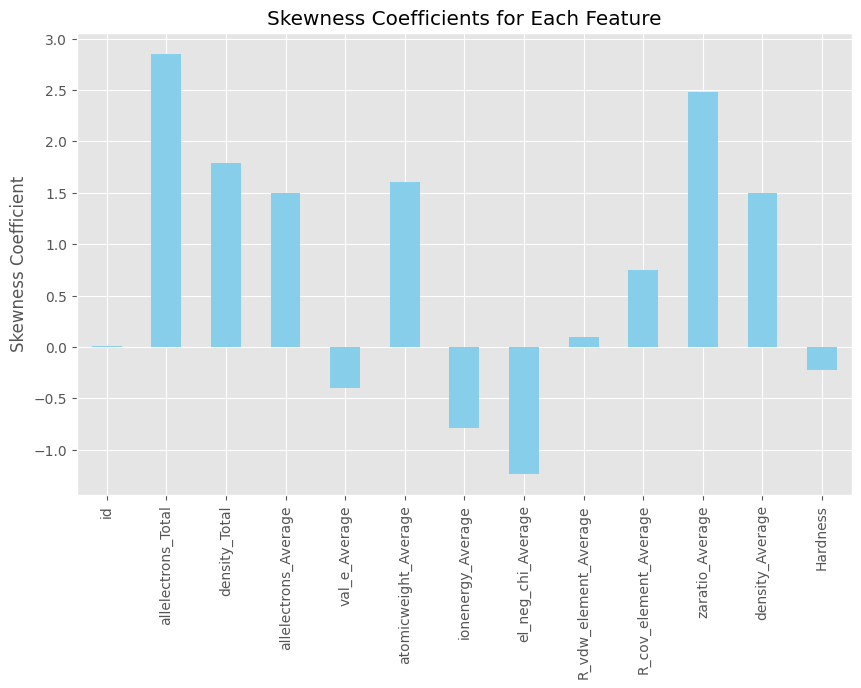

In [22]:
# measure skewness of train data using skewness metrics 'skewness coefficient' & Q-Q Plot
# calculate skewness for each feature
skewness_per_feature = df_train_no_outliers.skew()

# Display skewness coefficients
print("Skewness coefficients for each feature:")
print(skewness_per_feature)

# Plot skewness coefficients
plt.figure(figsize=(10, 6))
skewness_per_feature.plot(kind='bar', color='skyblue')
plt.title('Skewness Coefficients for Each Feature')
plt.ylabel('Skewness Coefficient')
plt.show()

- The data distribution in 'allelectrons_Total', 'density_Total', 'allelectrons_Average', 'atomicweight_Average', 'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average' & 'density_Average' features are more or less right skewed.
- The data distribution in 'val_e_Average', 'ionenergy_Average' & 'el_neg_chi_Average'  features are more or less left skewed.

<h2 style='color:red'>Variance Check</h2>

In [23]:
print("Variance of each feature in train data\n", df_train_no_outliers.var())

Variance of each feature in train data
 id                       9.010968e+06
allelectrons_Total       7.415916e+03
density_Total            9.039679e+01
allelectrons_Average     6.871962e+01
val_e_Average            2.631546e-01
atomicweight_Average     4.160136e+02
ionenergy_Average        8.884364e-01
el_neg_chi_Average       6.002712e-02
R_vdw_element_Average    1.299131e-02
R_cov_element_Average    1.975241e-02
zaratio_Average          1.460447e-03
density_Average          2.632605e+00
Hardness                 2.655317e+00
dtype: float64


In [24]:
# Low variance features in train data
num_variable_var = []

for i in range(0, len(df_train_no_outliers.var())):
    # Setting the threshold as 0.1%
    if df_train_no_outliers.var()[i] <= 0.1:
        num_variable_var.append(df_train_no_outliers.columns[i])

num_variable_var

['el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average']

In [25]:
# dropping the low variance features from train data
high_variance_df = df_train_no_outliers.drop(num_variable_var, axis=1)
high_variance_df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,1.86481,6.0


In [26]:
# dropping the low variance features from test data
high_variance_test_df = mohs_hardness_test_data.drop(num_variable_var, axis=1)
high_variance_test_df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,0.93456


<h2 style='color:red'>Data Transformation to handle skewness</h2>

In [27]:
# drop id & Hardness columns from train data
high_variance_df.drop(["id", "Hardness"], axis=1, inplace=True)

# drop id column from test data
high_variance_test_df.drop(["id"], axis=1, inplace=True)

In [28]:
high_variance_df.columns[high_variance_df.skew() > 0]

Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'atomicweight_Average', 'density_Average'],
      dtype='object')

In [29]:
high_variance_df.columns[high_variance_df.skew() < 0]

Index(['val_e_Average', 'ionenergy_Average'], dtype='object')

In [30]:
# Apply log transformation to right-skewed features of train data
log_transformed_right = np.log1p(high_variance_df[high_variance_df.columns[high_variance_df.skew() > 0]])

# Apply log transformation to left-skewed features (reverse the sign) of train data
log_transformed_left = -np.log1p(high_variance_df[high_variance_df.columns[high_variance_df.skew() < 0]])

# Combine the transformed features with the untransformed ones
log_transformed_df = pd.concat([log_transformed_right, log_transformed_left], axis=1)

# print(log_transformed_df)

In [31]:
# Display skewness after log transformation
print("\nSkewness after log transformation:")
print(log_transformed_df.skew())


Skewness after log transformation:
allelectrons_Total     -0.312831
density_Total          -0.181856
allelectrons_Average    0.628213
atomicweight_Average    0.617435
density_Average         0.732192
val_e_Average           0.834154
ionenergy_Average       1.039233
dtype: float64


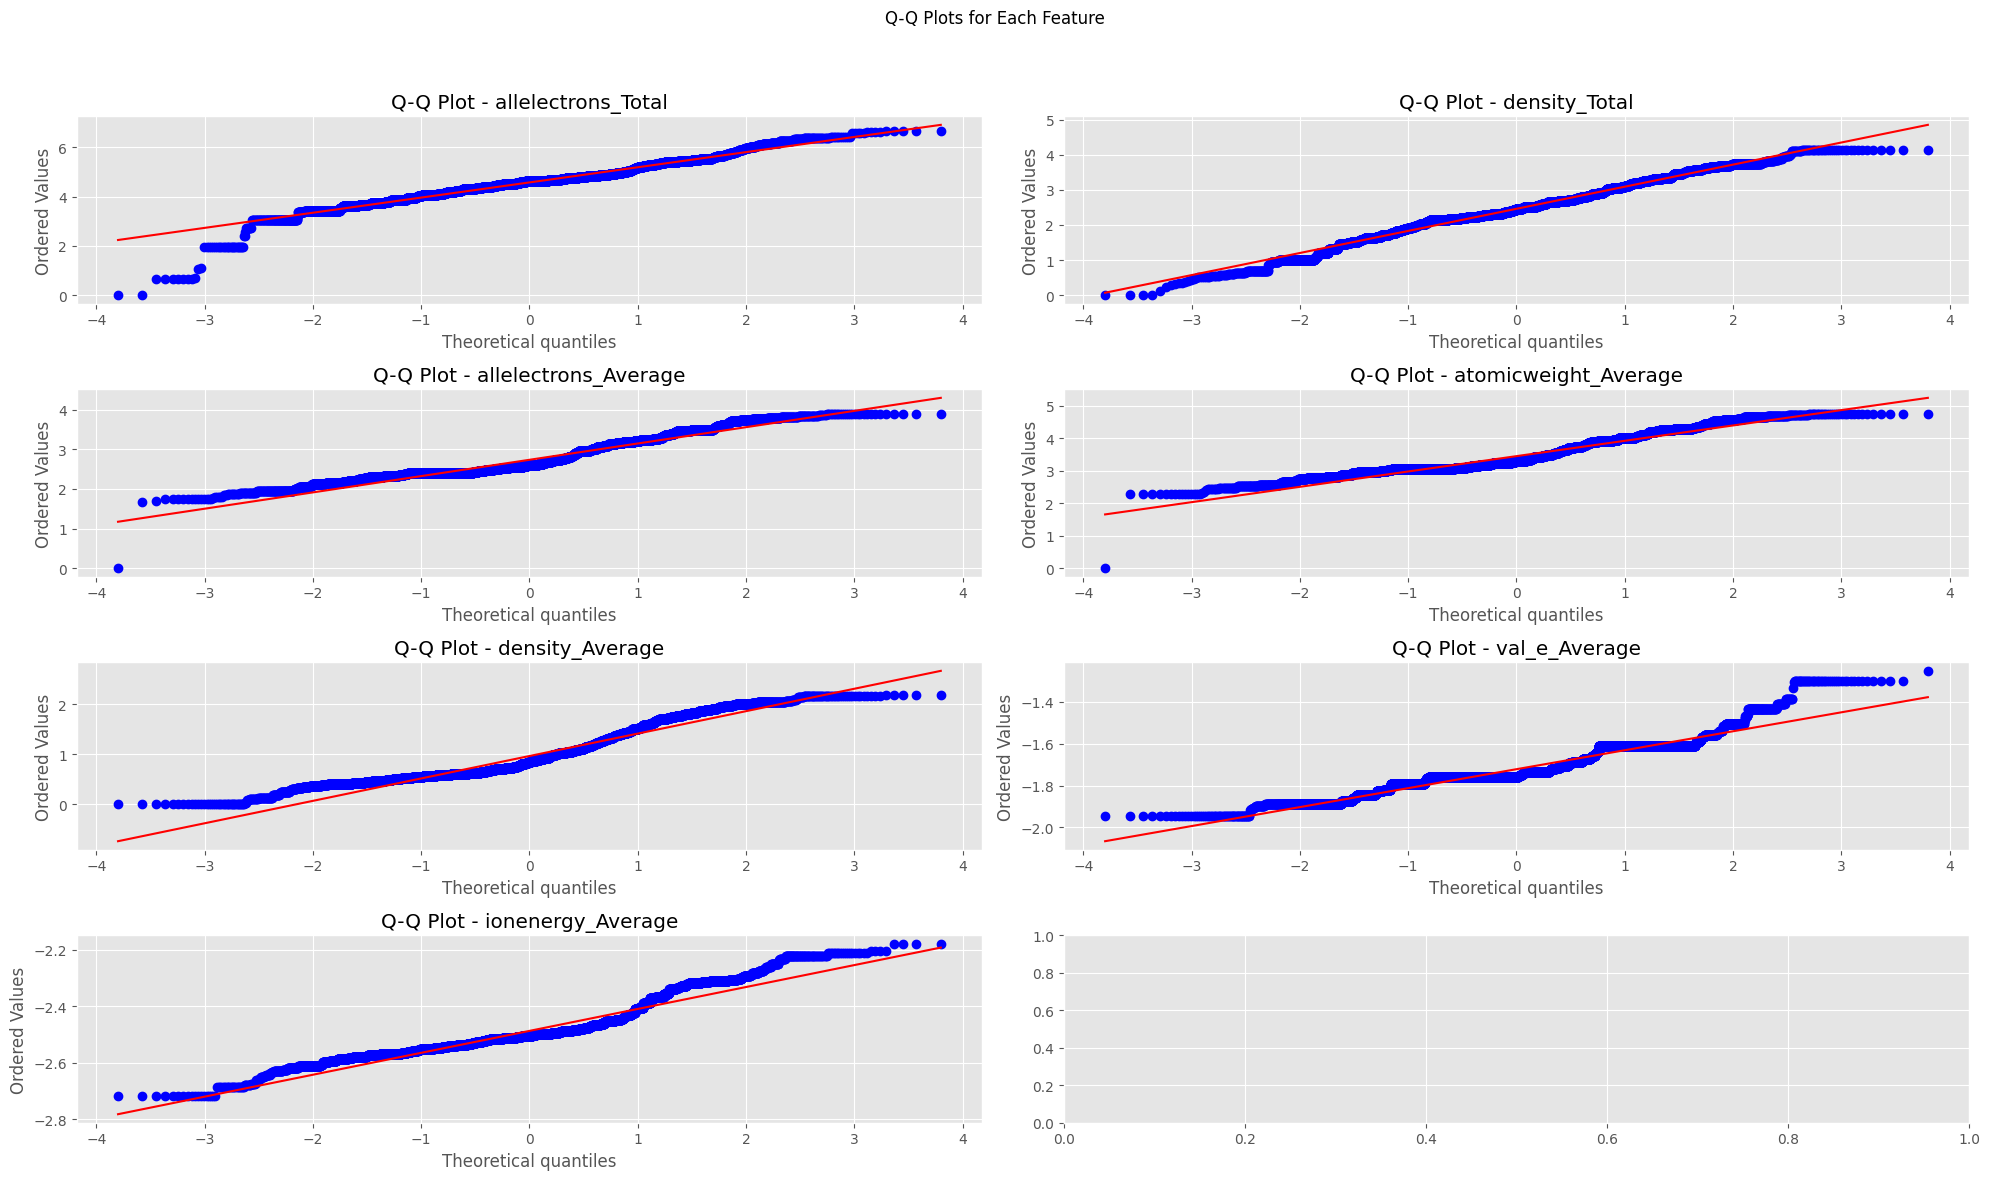

In [32]:
# Set the number of subplots per row
subplots_per_row = 2
# Calculate the number of rows needed
num_features = log_transformed_df.shape[1]
num_rows = (num_features - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 3 * num_rows))
fig.suptitle('Q-Q Plots for Each Feature')

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Plot Q-Q plots for each feature
for i, (column, ax) in enumerate(zip(log_transformed_df.columns, axes)):
    probplot(log_transformed_df[column], plot=ax)
    ax.set_title(f'Q-Q Plot - {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [33]:
# Apply log transformation to right-skewed features of test data
log_transformed_right_test = np.log1p(high_variance_test_df[['allelectrons_Total', 'density_Total', 'allelectrons_Average',
                                                           'atomicweight_Average', 'density_Average']])

# Apply log transformation to left-skewed features (reverse the sign) of test data
log_transformed_left_test = -np.log1p(high_variance_test_df[['val_e_Average', 'ionenergy_Average']])

# Combine the transformed features with the untransformed ones
log_transformed_test_df = pd.concat([log_transformed_right_test, log_transformed_left_test], axis=1)

# print(log_transformed_test_df)

<h2 style='color:red'>Feature Scaling</h2>

In [34]:
scaler = RobustScaler()
# Feature scaling on training data
scaled_df = pd.DataFrame(scaler.fit_transform(log_transformed_df), columns=log_transformed_df.columns)
scaled_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,atomicweight_Average,density_Average,val_e_Average,ionenergy_Average
0,0.000000,-2.719222,-0.305591,-0.279048,-0.287384,0.000000,0.157607
1,0.000000,-0.438889,-0.305591,-0.297300,-0.450689,0.000000,-0.834261
2,-0.433614,-0.224857,0.308454,0.313539,0.117742,-1.540408,-0.879769
3,0.000000,-0.238538,-0.305591,-0.302325,-0.389113,0.000000,0.309475
4,0.235020,-0.124433,-0.102950,-0.048846,0.318829,0.000000,-0.615536


In [35]:
# Feature scaling on test data
scaled_test_df = pd.DataFrame(scaler.fit_transform(log_transformed_test_df), columns=log_transformed_test_df.columns)
scaled_test_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,atomicweight_Average,density_Average,val_e_Average,ionenergy_Average
0,3.468830,3.262116,1.326615,1.323778,0.234810,-0.594058,1.856250
1,-0.166629,-0.088226,0.446692,0.471397,0.034494,-0.928917,-0.797494
2,0.235020,-0.394145,-0.110172,-0.136470,-0.372444,-0.058335,0.168512
3,0.000000,-0.196906,-0.294285,-0.288652,-0.087744,-0.058335,-0.797494
4,-0.942566,-1.164809,-0.176320,-0.148907,-0.265532,0.941665,-0.072867


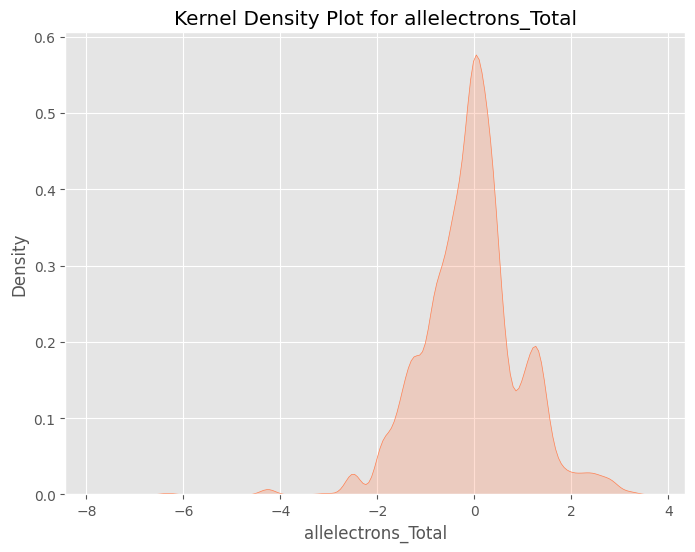

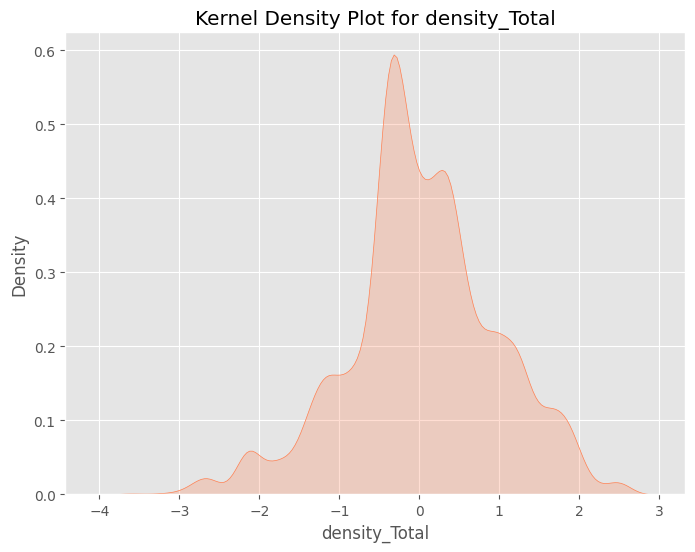

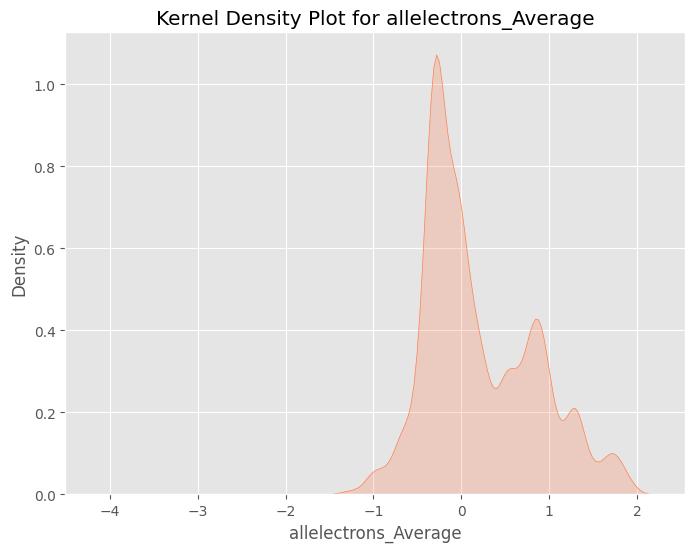

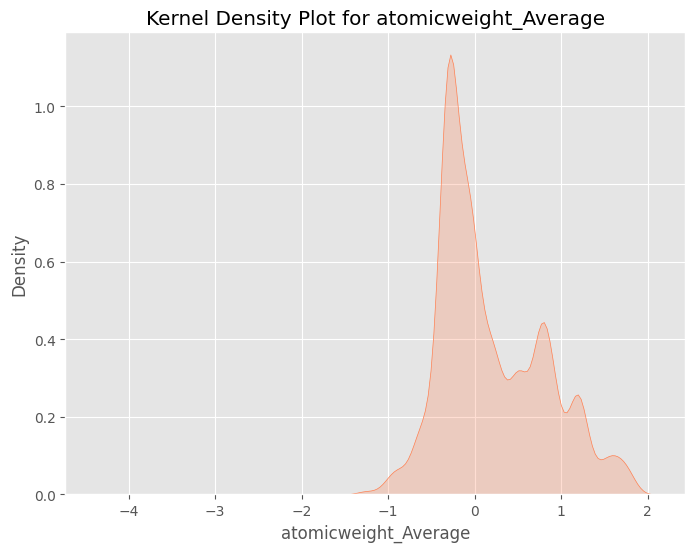

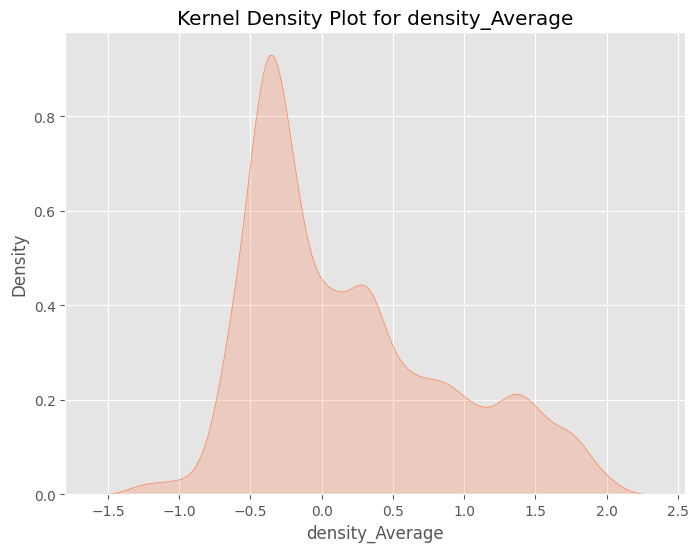

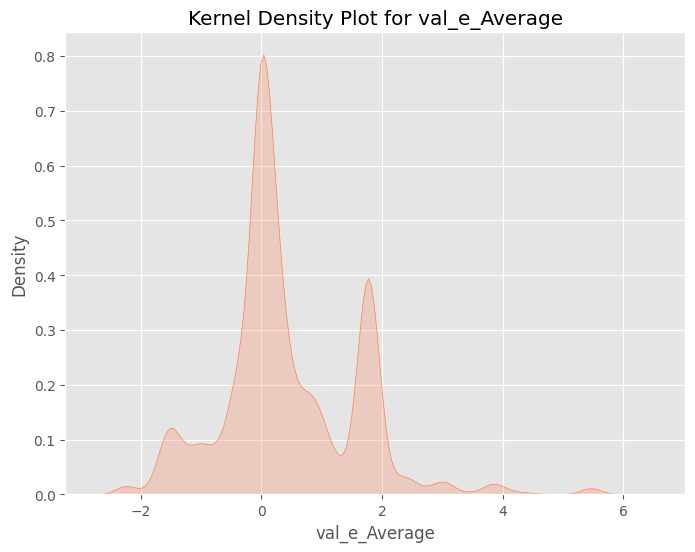

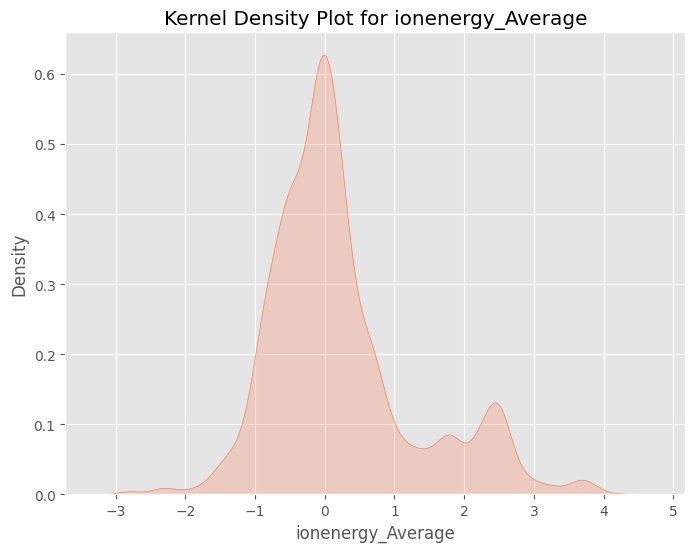

In [36]:
# data distribution of each scaled training feature using Kernel Density Plot
for column in scaled_df.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(scaled_df[column], color='coral', fill=True)
    plt.title(f'Kernel Density Plot for {column}')
    plt.show()

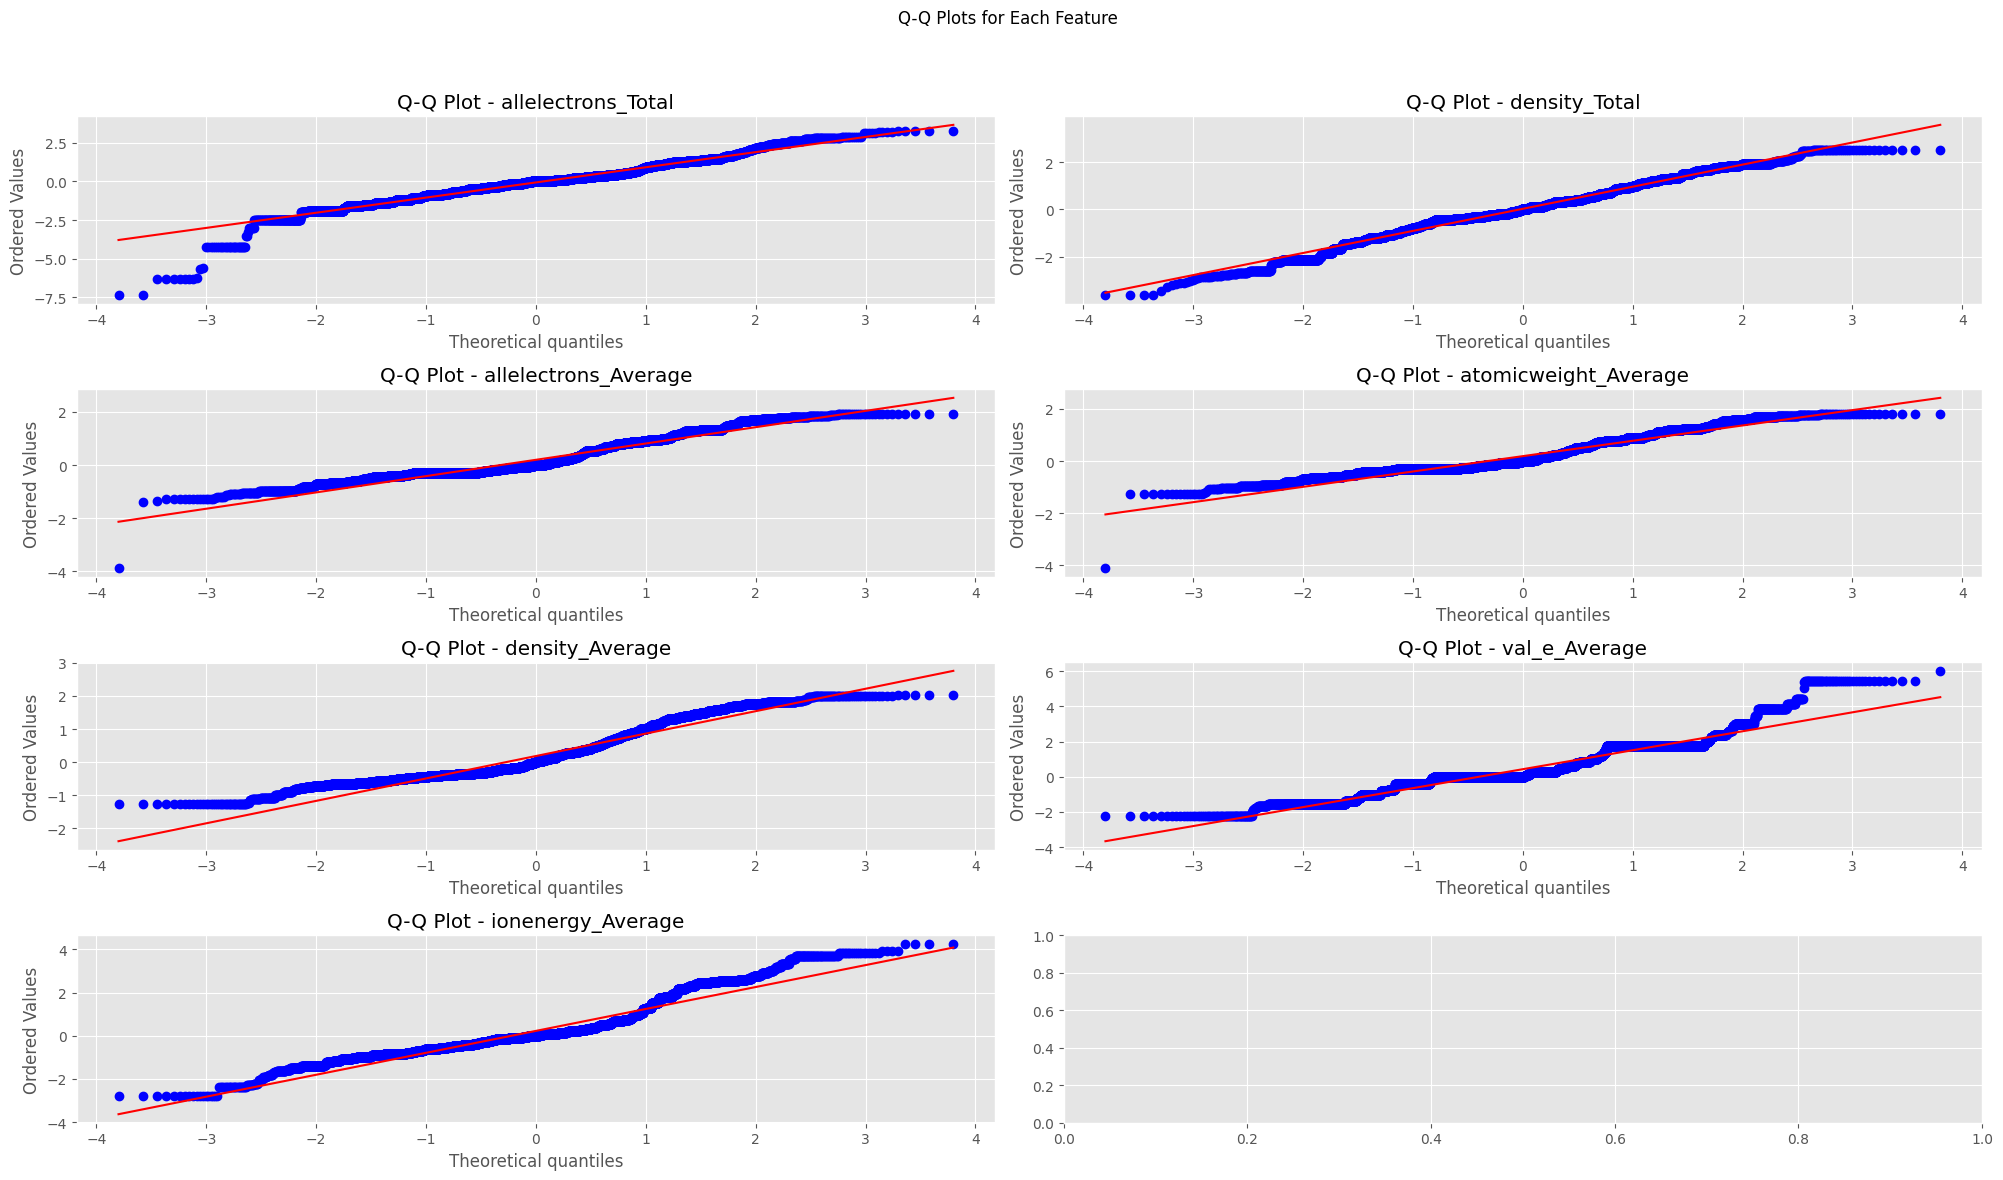

In [37]:
# Set the number of subplots per row
subplots_per_row = 2
# Calculate the number of rows needed
num_features = scaled_df.shape[1]
num_rows = (num_features - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 3 * num_rows))
fig.suptitle('Q-Q Plots for Each Feature')

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Plot Q-Q plots for each feature
for i, (column, ax) in enumerate(zip(scaled_df.columns, axes)):
    probplot(scaled_df[column], plot=ax)
    ax.set_title(f'Q-Q Plot - {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

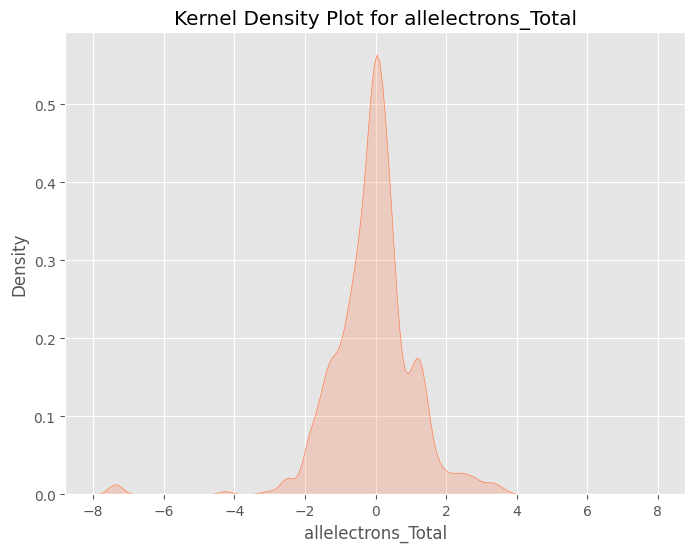

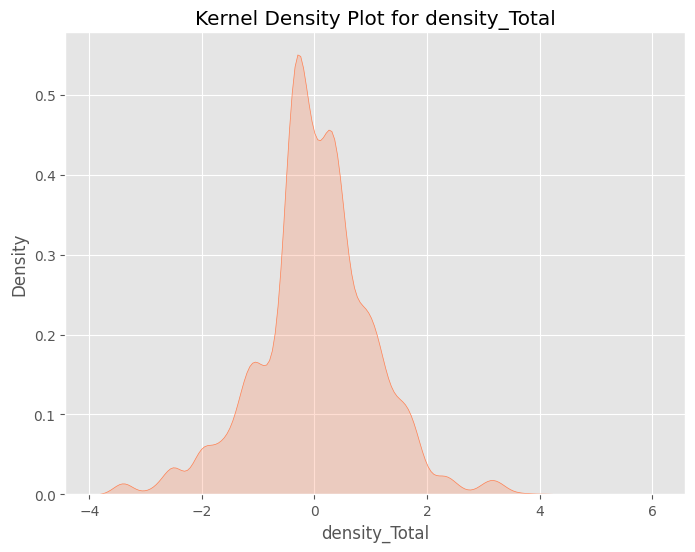

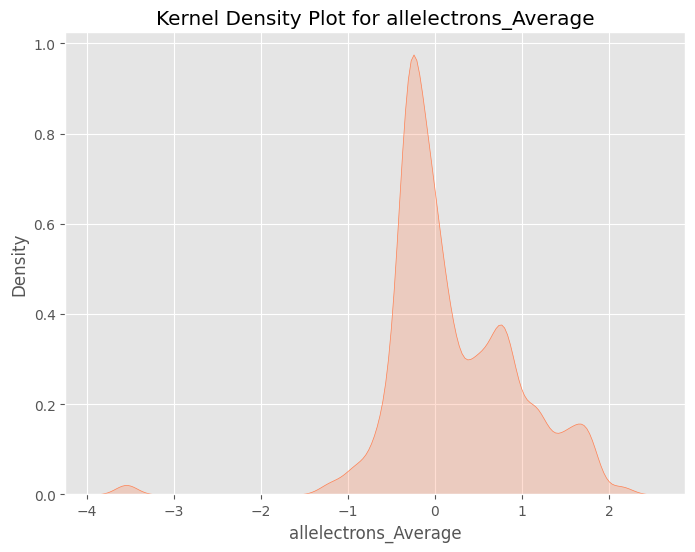

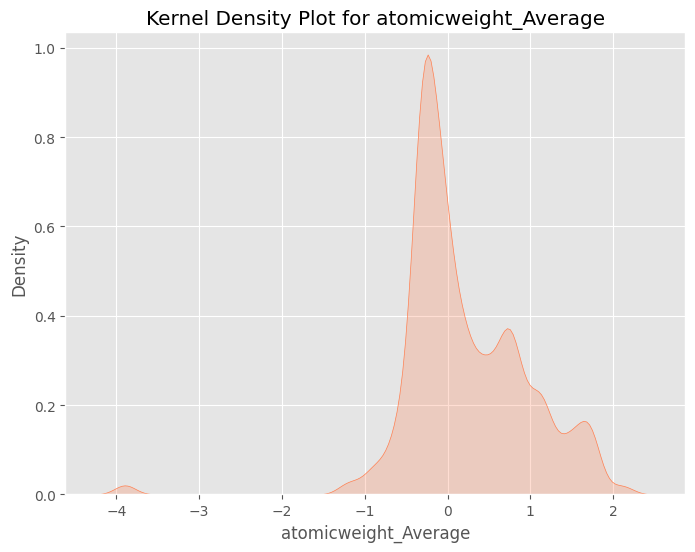

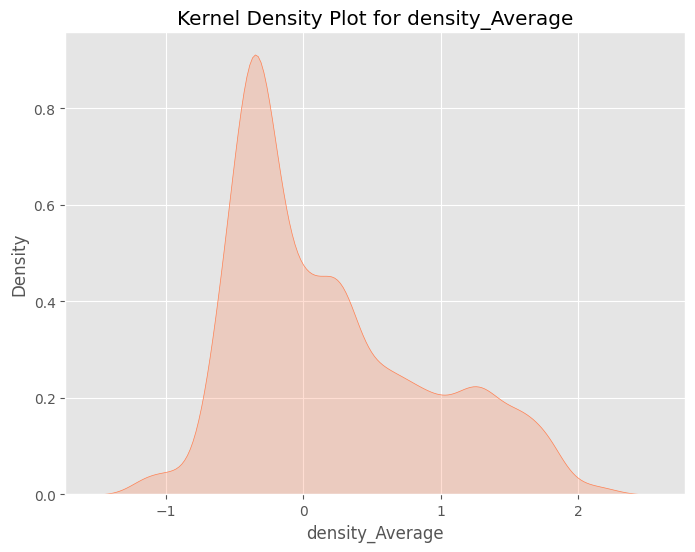

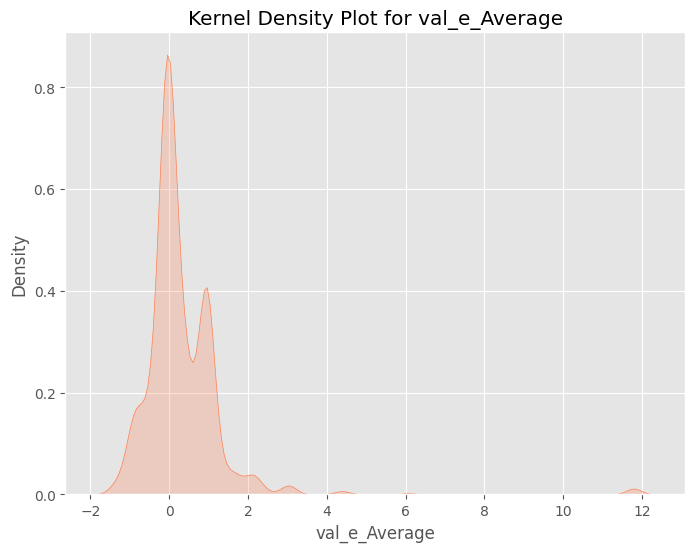

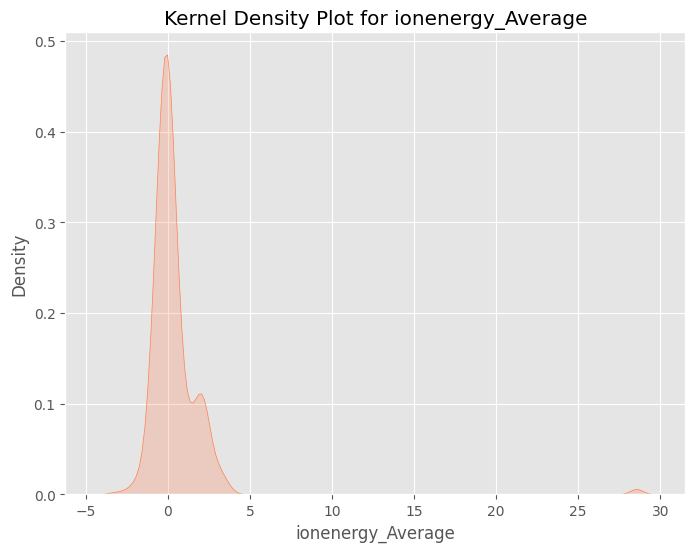

In [38]:
# data distribution of each scaled feature using Kernel Density Plot
for column in scaled_test_df.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(scaled_test_df[column], color='coral', fill=True)
    plt.title(f'Kernel Density Plot for {column}')
    plt.show()

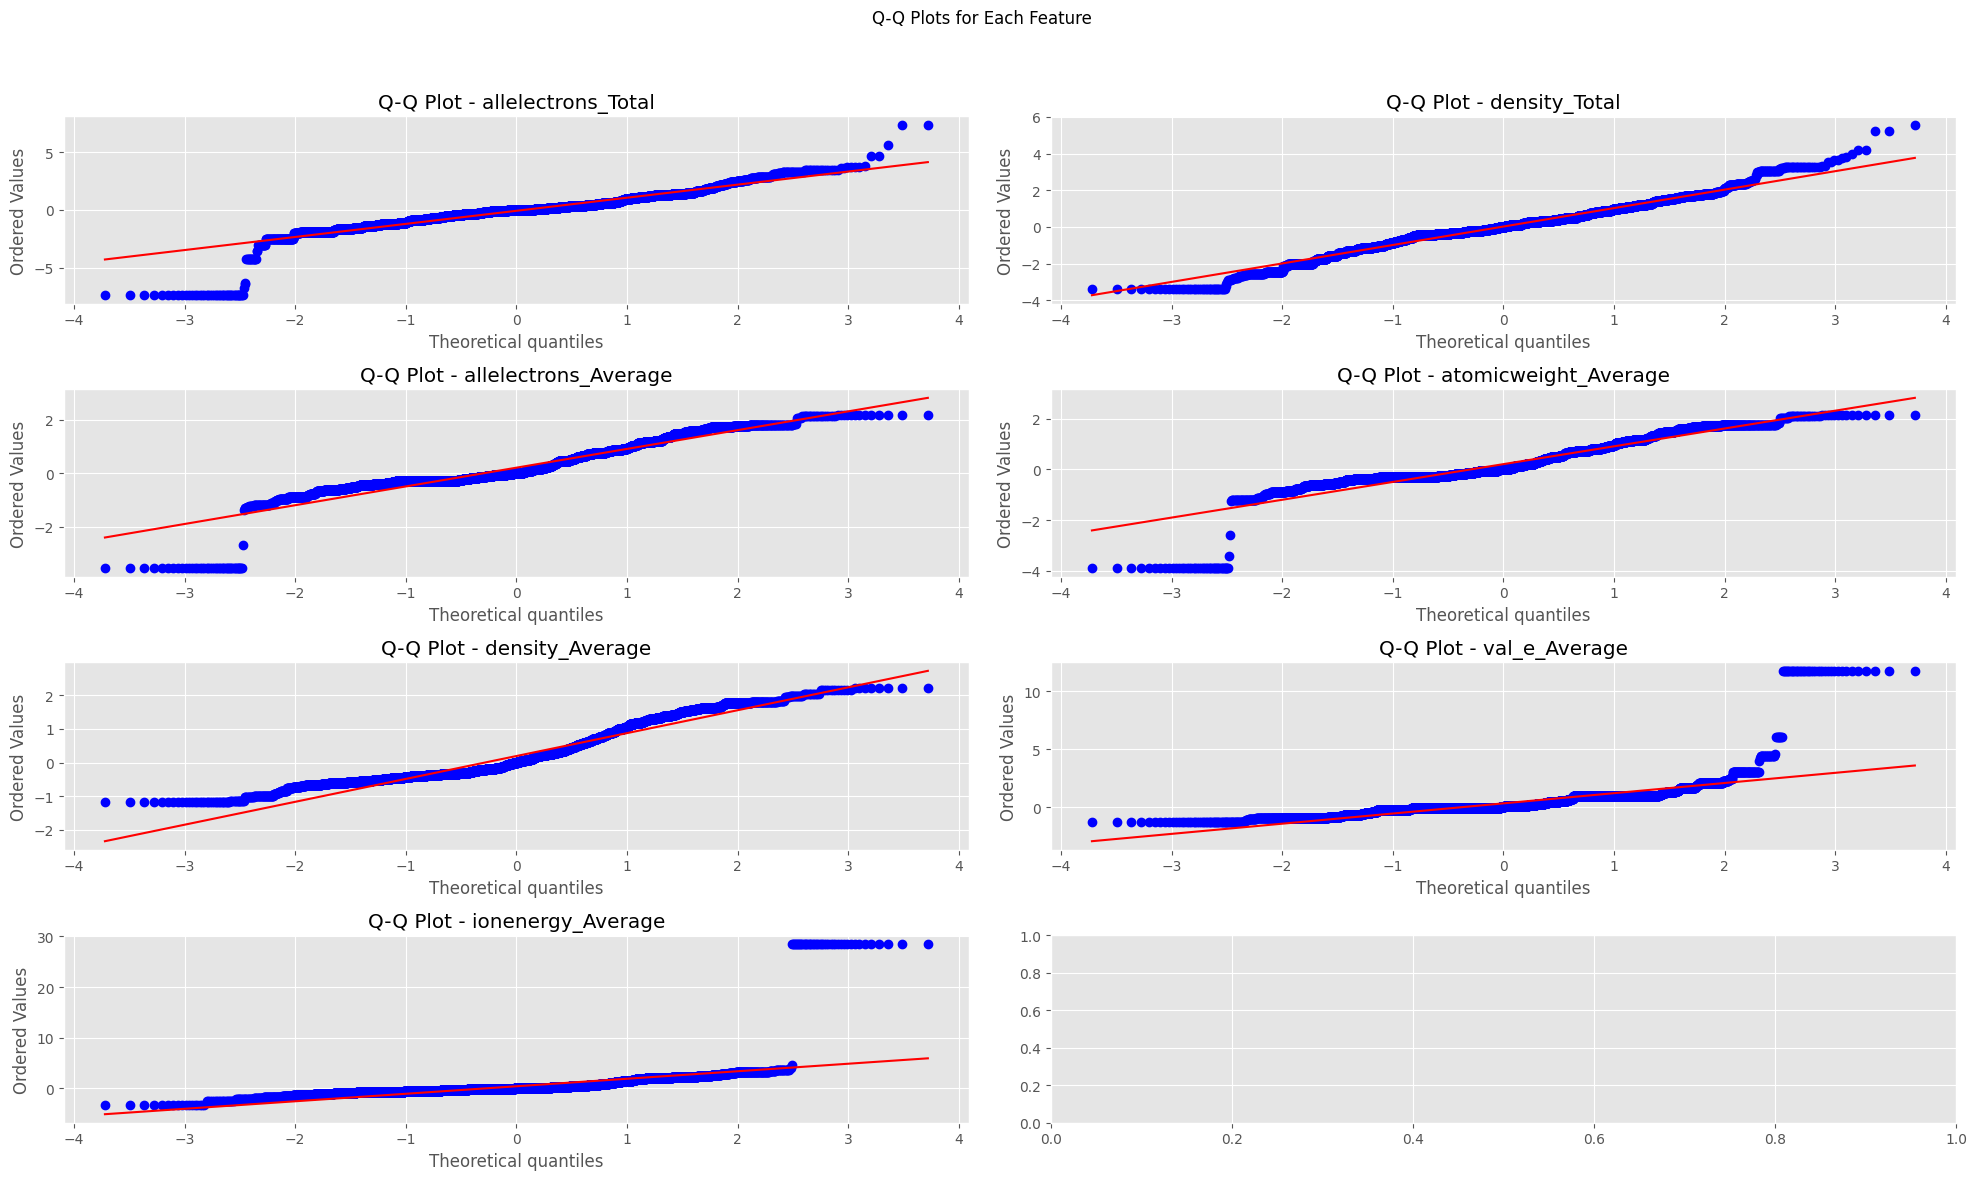

In [39]:
# Set the number of subplots per row
subplots_per_row = 2
# Calculate the number of rows needed
num_features = scaled_test_df.shape[1]
num_rows = (num_features - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 3 * num_rows))
fig.suptitle('Q-Q Plots for Each Feature')

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Plot Q-Q plots for each feature
for i, (column, ax) in enumerate(zip(scaled_test_df.columns, axes)):
    probplot(scaled_test_df[column], plot=ax)
    ax.set_title(f'Q-Q Plot - {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<h2 style='color:red'>PCA</h2>

In [40]:
# Apply PCA to reduce dimensionality
pca = PCA()
X_train_pca = pca.fit_transform(scaled_df)
X_test_pca = pca.transform(scaled_test_df)

In [41]:
y_train = df_train_no_outliers["Hardness"]
id_train = df_train_no_outliers['id']
id_test = mohs_hardness_test_data['id']

<h2 style='color:red'>Model Creation</h2>

In [42]:
# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor()

In [43]:
# Define the hyperparameter probability distribution for random search
param_dist = {'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

In [44]:
# Create KFold cross-validator
kfcv = KFold(n_splits=10, random_state=42, shuffle=True)

In [45]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_regressor,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='neg_median_absolute_error',
                                   cv=kfcv,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV on the PCA-transformed training data
random_search.fit(X_train_pca, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  20.6s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  19.9s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  20.5s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.4min


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  20.7s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  20.0s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.7s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.1s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.0s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.4s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.4min


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  20.6s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  20.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  20.7s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.4min
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.3min
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.4min


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_median_absolute_error',
                   verbose=2)

In [46]:
# Get the best hyperparameters from RandomSearchCV
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


In [47]:
# Get the best model from RandomSearchCV
best_model = random_search.best_estimator_

In [48]:
# Train the RandomForestRegressor model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train_pca, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=40, max_features='auto', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200)

In [49]:
# Model Evaluation on training data
y_train_pred = best_rf_model.predict(X_train_pca)
rf_reg_mae = median_absolute_error(y_train, y_train_pred)
print(f'Training Median Absolute Error: {rf_reg_mae:.2f}')

Training Median Absolute Error: 0.42


In [50]:
# Make prediction on test set
y_pred = best_rf_model.predict(X_test_pca)

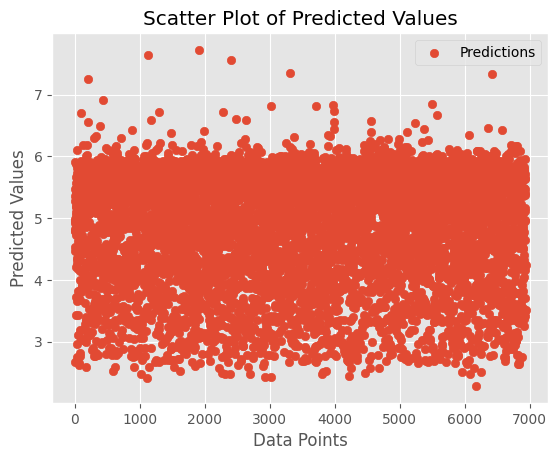

In [51]:
# Scatter plot of predicted values
plt.scatter(range(len(y_pred)), y_pred, label='Predictions')
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Scatter Plot of Predicted Values')
plt.show()

In [52]:
# Combine Predictions with IDs for the expected output
output_df = pd.DataFrame({'id': id_test, 'Hardness': y_pred})
output_df.head()

,id,Hardness
0,10407,4.475580
1,10408,4.525323
2,10409,5.905535
3,10410,5.362419
4,10411,4.925891


In [53]:
output_df.shape

(6939, 2)

In [54]:
# Save the predictions to a CSV file
output_df.to_csv('predictions.csv', index=False)